# Explorar las ofertas relámpago, ¿qué insights puedes generar? 

## Carregar dados

In [175]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("ofertas_relampago.csv", parse_dates=["OFFER_START_DATE", "OFFER_START_DTTM", "OFFER_FINISH_DTTM"])
data.head(5)

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.0,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS
2,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,lightning_deal,15,12,10.73,3.0,NaN,none,COMPUTERS,CE,MLM-SPEAKERS
3,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:36:12+00:00,lightning_deal,15,13,7.03,2.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES
4,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 15:48:12+00:00,lightning_deal,15,0,39.65,15.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES


## Análise das colunas

In [176]:
data["OFFER_TYPE"].unique()

array(['lightning_deal'], dtype=object)

In [177]:
data["DOM_DOMAIN_AGG1"].unique()

array(['PETS FOOD', 'PET PRODUCTS', 'COMPUTERS', 'ELECTRONICS', 'APPAREL',
       'PARTY', 'TOYS AND GAMES', 'PERSONAL CARE', 'INDUSTRY',
       'TOOLS AND CONSTRUCTION', 'HOME&DECOR', 'SPORTS',
       'BOOKS, MULTIMEDIA & OTHER E!', 'AUTOPARTS', 'DRINKS', 'FOOTWEAR',
       'WHEELS & TIRES', 'BEAUTY EQUIPMENT', 'MOBILE',
       'APPAREL ACCESORIES', 'FOODS', 'PHARMACEUTICS', 'STATIONARY',
       'BABY', 'PERSONAL HYGIENE', 'OTHER', 'VEHICULAR MULTIMEDIA',
       'SUPLEMENTS', 'SECURITY', 'MOTOPARTS', 'CLEANING', 'ACC TOOLS',
       'MUSICAL INSTRUMENTS', 'ANTIQUES & HOBBIES', 'BATTERIES', 'AGRO'],
      dtype=object)

In [178]:
data["VERTICAL"].unique()

array(['CPG', 'OTHERS', 'CE', 'APP & SPORTS', 'T & B', 'BEAUTY & HEALTH',
       'HOME & INDUSTRY', 'ENTERTAINMENT', 'ACC'], dtype=object)

In [179]:
data.describe()

,OFFER_START_DATE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY
count,48746,48746.000000,48746.000000,24579.000000,24579.000000
mean,2021-07-05 11:24:49.008328704,35.007508,30.565216,51.208898,10.851052
min,2021-06-01 00:00:00,1.000000,-192.000000,0.280000,1.000000
25%,2021-06-22 00:00:00,5.000000,4.000000,5.730000,1.000000
50%,2021-07-07 00:00:00,10.000000,8.000000,12.420000,3.000000
75%,2021-07-21 00:00:00,15.000000,15.000000,30.925000,6.000000
max,2021-07-31 00:00:00,9000.000000,8635.000000,4836.570000,1646.000000
std,NaN,206.761058,195.813806,175.254414,45.475305


## Análise dos itens mais vendidos

In [180]:
data.sort_values(by="SOLD_QUANTITY", ascending=False).head(10)

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
13737,2021-07-19,2021-07-19 13:00:00+00:00,2021-07-19 21:00:55+00:00,lightning_deal,4000,2358,4570.31,1646.0,A,none,PHARMACEUTICS,BEAUTY & HEALTH,MLM-SURGICAL_AND_INDUSTRIAL_MASKS
11449,2021-07-27,2021-07-27 09:00:00+00:00,2021-07-27 17:01:05+00:00,lightning_deal,2000,497,4836.57,1503.0,A,none,BEAUTY EQUIPMENT,BEAUTY & HEALTH,MLM-DISPOSABLE_GLOVES
13742,2021-07-19,2021-07-19 12:00:00+00:00,2021-07-19 20:00:00+00:00,lightning_deal,7000,5650,3988.84,1358.0,A,none,PHARMACEUTICS,BEAUTY & HEALTH,MLM-SURGICAL_AND_INDUSTRIAL_MASKS
28614,2021-07-21,2021-07-21 12:00:00+00:00,2021-07-21 20:00:35+00:00,lightning_deal,4000,2781,3530.39,1218.0,A,none,PHARMACEUTICS,BEAUTY & HEALTH,MLM-SURGICAL_AND_INDUSTRIAL_MASKS
46620,2021-07-16,2021-07-16 12:00:00+00:00,2021-07-16 19:01:09+00:00,lightning_deal,1188,37,3198.34,1152.0,A,none,PHARMACEUTICS,BEAUTY & HEALTH,MLM-SURGICAL_AND_INDUSTRIAL_MASKS
11455,2021-07-27,2021-07-27 10:00:00+00:00,2021-07-27 17:00:00+00:00,lightning_deal,1500,518,1723.46,996.0,A,none,PHARMACEUTICS,BEAUTY & HEALTH,MLM-SURGICAL_AND_INDUSTRIAL_MASKS
11380,2021-07-27,2021-07-27 12:00:00+00:00,2021-07-27 20:00:00+00:00,lightning_deal,8000,7035,1679.97,965.0,A,none,PHARMACEUTICS,BEAUTY & HEALTH,MLM-THERMOMETERS
5774,2021-07-13,2021-07-13 12:00:00+00:00,2021-07-13 20:00:32+00:00,lightning_deal,3000,2924,2426.75,828.0,A,none,PHARMACEUTICS,BEAUTY & HEALTH,MLM-SURGICAL_AND_INDUSTRIAL_MASKS
13741,2021-07-19,2021-07-19 14:00:00+00:00,2021-07-19 17:48:51+00:00,lightning_deal,810,-1,2255.46,808.0,A,none,PHARMACEUTICS,BEAUTY & HEALTH,MLM-SURGICAL_AND_INDUSTRIAL_MASKS
22264,2021-07-28,2021-07-28 11:00:00+00:00,2021-07-28 16:04:19+00:00,lightning_deal,800,-2,1390.66,802.0,A,none,PHARMACEUTICS,BEAUTY & HEALTH,MLM-SURGICAL_AND_INDUSTRIAL_MASKS


Por essa tabela, podemos perceber que os produtos mais vendidos em quantidade são da vertical de Beauty & Health.

In [181]:
data.sort_values(by="SOLD_AMOUNT", ascending=False).head(10)

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
11449,2021-07-27,2021-07-27 09:00:00+00:00,2021-07-27 17:01:05+00:00,lightning_deal,2000,497,4836.57,1503.0,A,none,BEAUTY EQUIPMENT,BEAUTY & HEALTH,MLM-DISPOSABLE_GLOVES
37095,2021-06-18,2021-06-18 15:00:00+00:00,2021-06-18 23:00:00+00:00,lightning_deal,100,45,4678.68,75.0,A,free_shipping,MOBILE,CE,MLM-CELLPHONES
13737,2021-07-19,2021-07-19 13:00:00+00:00,2021-07-19 21:00:55+00:00,lightning_deal,4000,2358,4570.31,1646.0,A,none,PHARMACEUTICS,BEAUTY & HEALTH,MLM-SURGICAL_AND_INDUSTRIAL_MASKS
45804,2021-07-26,2021-07-26 17:00:00+00:00,2021-07-27 01:00:05+00:00,lightning_deal,2000,1931,4264.51,67.0,A,free_shipping,MOBILE,CE,MLM-CELLPHONES
13742,2021-07-19,2021-07-19 12:00:00+00:00,2021-07-19 20:00:00+00:00,lightning_deal,7000,5650,3988.84,1358.0,A,none,PHARMACEUTICS,BEAUTY & HEALTH,MLM-SURGICAL_AND_INDUSTRIAL_MASKS
28614,2021-07-21,2021-07-21 12:00:00+00:00,2021-07-21 20:00:35+00:00,lightning_deal,4000,2781,3530.39,1218.0,A,none,PHARMACEUTICS,BEAUTY & HEALTH,MLM-SURGICAL_AND_INDUSTRIAL_MASKS
43923,2021-07-12,2021-07-12 13:00:00+00:00,2021-07-12 21:00:00+00:00,lightning_deal,200,143,3524.05,110.0,A,free_shipping,MOBILE,CE,MLM-CELLPHONES
9813,2021-07-20,2021-07-20 18:00:00+00:00,2021-07-21 02:00:00+00:00,lightning_deal,200,149,3346.39,54.0,A,free_shipping,MOBILE,CE,MLM-CELLPHONES
612,2021-06-22,2021-06-22 15:00:00+00:00,2021-06-22 23:00:00+00:00,lightning_deal,200,149,3199.32,52.0,A,free_shipping,MOBILE,CE,MLM-CELLPHONES
46620,2021-07-16,2021-07-16 12:00:00+00:00,2021-07-16 19:01:09+00:00,lightning_deal,1188,37,3198.34,1152.0,A,none,PHARMACEUTICS,BEAUTY & HEALTH,MLM-SURGICAL_AND_INDUSTRIAL_MASKS


Por essa tabela, podemos perceber que os produtos mais vendidos em valor são das verticais de Beauty & Health e CE.

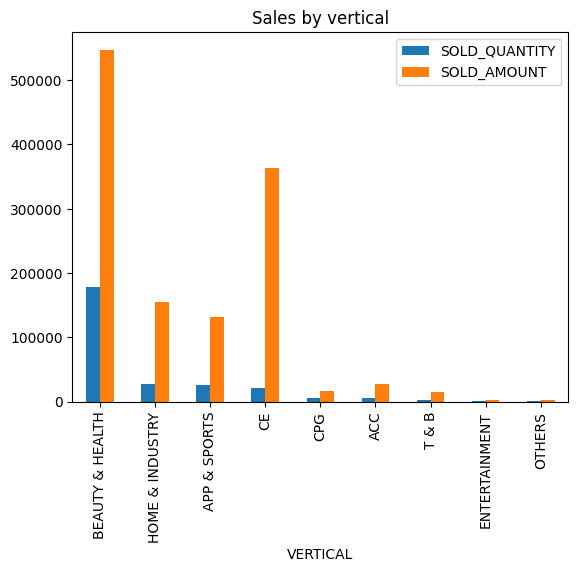

In [182]:
data.groupby(by="VERTICAL").agg({"SOLD_QUANTITY": "sum", "SOLD_AMOUNT": "sum"}).sort_values(by="SOLD_QUANTITY", ascending=False).plot.bar()
plt.title("Sales by vertical")
plt.show()

Aqui podemos concluir que apesar da vertical de Beauty & Health possuir as maiores vendas em quantidades e valores, a vertical de CE tem o maior ticket médio.

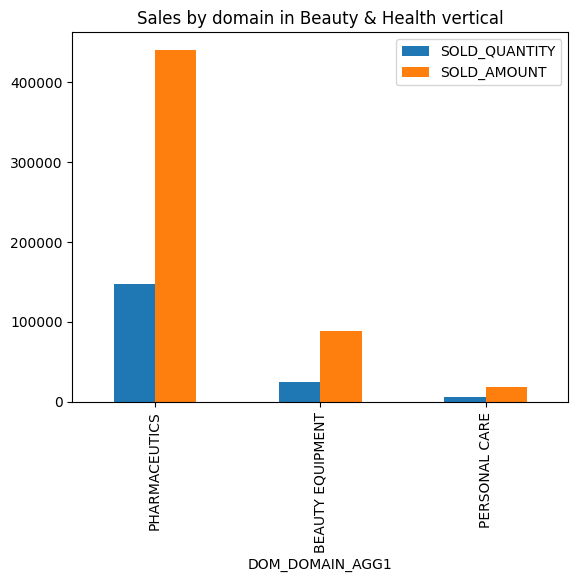

In [183]:

data[data["VERTICAL"] == "BEAUTY & HEALTH"].groupby(by="DOM_DOMAIN_AGG1").agg({"SOLD_QUANTITY": "sum", "SOLD_AMOUNT": "sum"}).sort_values(by="SOLD_QUANTITY", ascending=False).plot.bar()
plt.title("Sales by domain in Beauty & Health vertical")
plt.show()


Com esse gráfico, sabemos que dentro da vertical de Beauty & Health, o domínio Pharmaceutics é responsável pela maior parte das vendas.

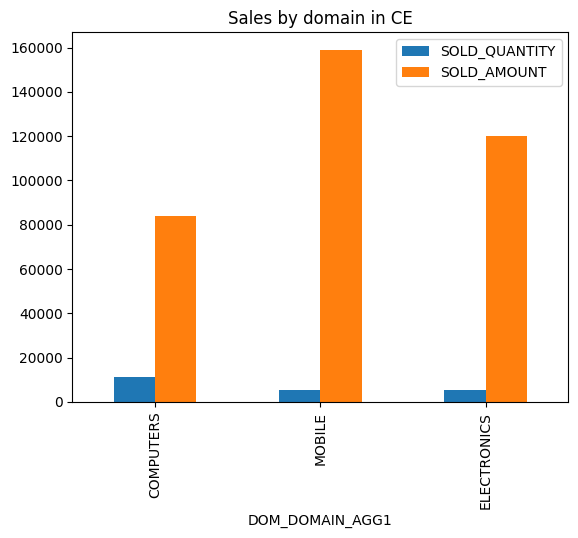

In [184]:
data[data["VERTICAL"] == "CE"].groupby(by="DOM_DOMAIN_AGG1").agg({"SOLD_QUANTITY": "sum", "SOLD_AMOUNT": "sum"}).sort_values(by="SOLD_QUANTITY", ascending=False).plot.bar()
plt.title("Sales by domain in CE")
plt.show()

Com esse gráfico, sabemos que dentro da vertical de CE, o domínio mobile é responsável pela maior parte das vendas.

## Impacto do frete grátis nas vendas

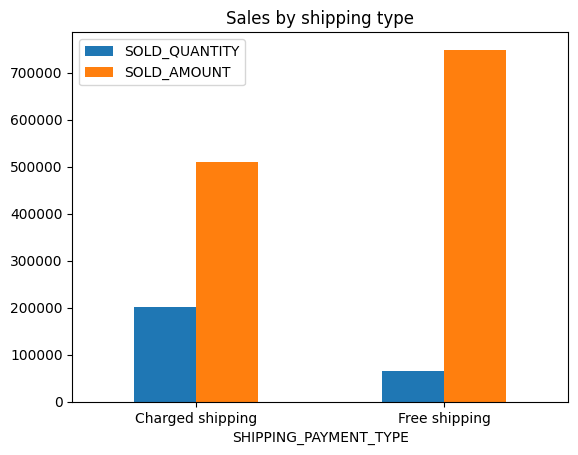

In [185]:
data.groupby(by="SHIPPING_PAYMENT_TYPE").agg({"SOLD_QUANTITY": "sum", "SOLD_AMOUNT": "sum"}).sort_values(by="SOLD_QUANTITY", ascending=False).plot.bar()
plt.xticks([0,1],["Charged shipping", "Free shipping"], rotation=0)
plt.title("Sales by shipping type")
plt.show()

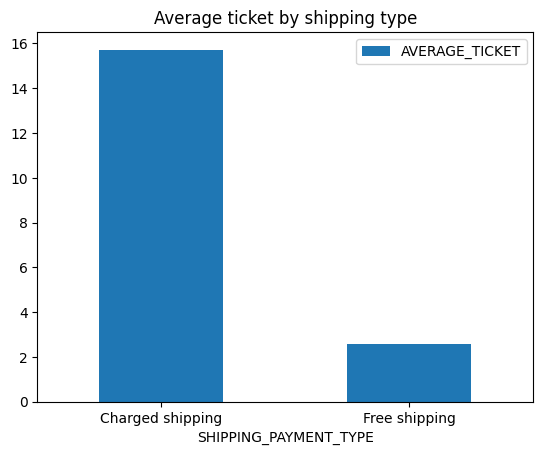

In [211]:
data.loc[:, "AVERAGE_TICKET"] = data["SOLD_AMOUNT"] / data["SOLD_QUANTITY"]
data.groupby(by="SHIPPING_PAYMENT_TYPE").agg({"AVERAGE_TICKET": "mean"}).sort_values(by="AVERAGE_TICKET", ascending=False).plot.bar()
plt.xticks([0,1],["Charged shipping", "Free shipping"], rotation=0)
plt.title("Average ticket by shipping type")
plt.show()

Analisando o ticket médio, vemos que a média do ticket para itens com frete grátis é menor que a dos com frete pago.

## Análise de duração e sazonalidade das campanhas

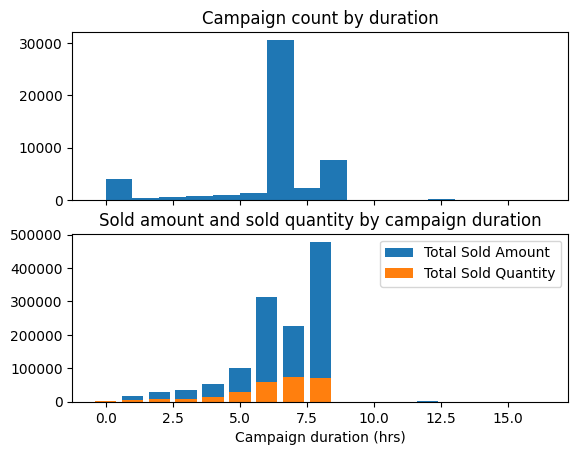

In [214]:
data.loc[:, "CAMPAIGN_DURATION"] = (data["OFFER_FINISH_DTTM"] - data["OFFER_START_DTTM"]).apply(lambda delta: round(delta.seconds / 3600))
grouped = data.groupby('CAMPAIGN_DURATION').agg({'SOLD_AMOUNT': 'sum', 'SOLD_QUANTITY': 'sum'}).reset_index()

fig, [ax0, ax1] = plt.subplots(2, 1, sharex=True)
ax0.hist(data['CAMPAIGN_DURATION'], bins=16, label='Number of campaigns')
ax0.set_title('Campaign count by duration')

ax1.bar(grouped['CAMPAIGN_DURATION'], grouped['SOLD_AMOUNT'], label='Total Sold Amount')
ax1.bar(grouped['CAMPAIGN_DURATION'], grouped['SOLD_QUANTITY'], label='Total Sold Quantity')
ax1.set_title('Sold amount and sold quantity by campaign duration')
plt.xlabel('Campaign duration (hrs)')
plt.legend()
plt.show()


Por esses gráficos, vemos que há uma maior frequência para campanhas que duram próximo a 6 horas, e que a quantidade total vendida é maior para campanhas de 8 horas.

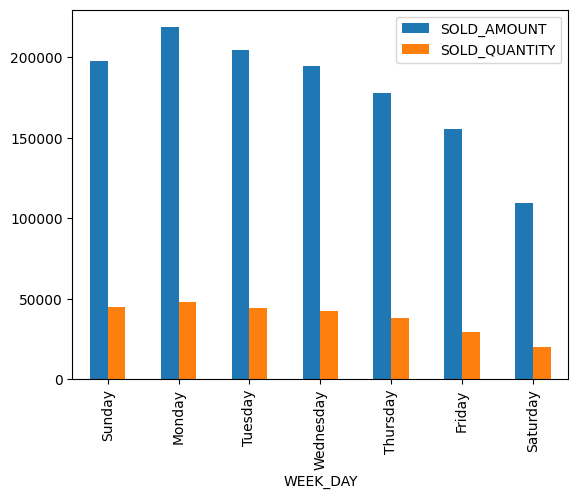

In [188]:
import numpy as np

data.loc[:, "WEEK_DAY"] = data["OFFER_START_DATE"].dt.day_of_week
data.groupby(by="WEEK_DAY").agg({"SOLD_AMOUNT": "sum", "SOLD_QUANTITY": "sum"}).plot.bar()
plt.xticks(np.arange(0,7,1), ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"])
plt.show()


Analisando a sazonalidade das vendas, percebemos que na segunda houve maior volume de vendas na segunda, e volume significativamente menor no sábado.